Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re

Load data in dataframe df1

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Show data dimention

In [3]:
df1.shape

(13320, 9)

Group data by area type to get more information

In [4]:
df1.groupby("area_type").agg("count")
#df1.groupby("area_type")["area_type"].agg("count")

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


Check null values in data

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Drop availability column because its data won't help in our project. Drop society column because half of its data is null values.

In [6]:
df2=df1.drop(['availability','society'],axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


About balcon column, it has about 600 null values, so instead of drop these rows, will fill them with median of the column.

In [7]:
df2["balcony"]=df2["balcony"].fillna(int(df2["balcony"].median()))

Because the rest null values are not a lot comparing with the total amount of data, will drop them.

In [8]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## clean size column.

size column has more than expression to show the house size(BHK,RK,bedroom).

In [9]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

What we need here is just the number of bedrooms.

In [10]:
df3["size"]=df3['size'].apply(lambda x: x.split(" ")[0])

<ipython-input-10-e2f36f8abe72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["size"]=df3['size'].apply(lambda x: x.split(" ")[0])


In [11]:
df3['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

check the type of data

In [12]:
df3.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

convert data type of sizy, bath, and balcony

In [13]:
df3[['size','bath','balcony']]=df3[['size','bath','balcony']].apply(lambda x: x.astype("int32"))
#df3['total_sqft']=df3.total_sqft.astype("float")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Check houses have more than 10 bedrooms.

In [14]:
df3[df3["size"]>10]

,area_type,location,size,total_sqft,bath,balcony,price
459,Super built-up Area,1 Giri Nagar,11,5000,9,3,360.0
1718,Super built-up Area,2Electronic City Phase II,27,8000,27,0,230.0
1768,Plot Area,1 Ramamurthy Nagar,11,1200,11,0,170.0
3379,Super built-up Area,1Hanuman Nagar,19,2000,16,2,490.0
3609,Super built-up Area,Koramangala Industrial Layout,16,10000,16,2,550.0
3853,Plot Area,1 Annasandrapalya,11,1200,6,3,150.0
4684,Plot Area,Munnekollal,43,2400,40,0,660.0
4916,Super built-up Area,1Channasandra,14,1250,15,0,125.0
6533,Plot Area,Mysore Road,12,2232,6,2,300.0
7979,Super built-up Area,1 Immadihalli,11,6000,12,2,150.0


The houses that have more than 11 bedrooms look like an error, so will drop them.

In [15]:
df3=df3[df3["size"]<12]

## Clean total_sqft column

When convert total_sqft data typy to float, we find there is 190 values with charachters. We will take the average. of the range as total sqft.

In [16]:
df3['total_sqft']=df3['total_sqft'].astype('float')

ValueError: could not convert string to float: '2100 - 2850'

Find the average of the range in total_sqrt

In [17]:
df3[df3['total_sqft'].str.contains(" - ")]['total_sqft'].count()

144

In [18]:
df3[['min_total_sqft','max_total_sqft']]=df3['total_sqft'].str.split(" - ",expand=True)

In [19]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,min_total_sqft,max_total_sqft
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39.07,1056,None
1,Plot Area,Chikka Tirupathi,4,2600,5,3,120.00,2600,None
2,Built-up Area,Uttarahalli,3,1440,2,3,62.00,1440,None
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,95.00,1521,None
4,Super built-up Area,Kothanur,2,1200,2,1,51.00,1200,None


In [20]:
if df3['total_sqft'].str.contains(" - ") is True:
    df3['total_sqft']=(df3['min_total_sqft']+df3['max_total_sqft'])/2
else:
    df3['total_sqft']=df3['min_total_sqft']

Union the units to feet

In [21]:
df3['units']=df3['total_sqft'].str.extract(r"(\D{1,})",expand=True)
df3['total_Sqft']=df3['total_sqft'].str.extract(r"(\d{1,}[.]*\d{0,})",expand=True)

In [22]:
df3['units'].unique()

array([nan, '.', 'Perch', 'Sq. Meter', 'Sq. Yards', 'Acres', 'Cents',
       'Guntha', 'Grounds'], dtype=object)

In [23]:
df3['total_Sqft']=df3['total_Sqft'].astype('float')

In [24]:
df3.loc[(df3['units']=='Sq. Meter'),['total_Sqft']]=df3['total_Sqft']*10.7639
df3.loc[(df3['units']=='Perch'),['total_Sqft']]=df3['total_Sqft']*272.25
df3.loc[(df3['units']=='Sq. Yards'),['total_Sqft']]=df3['total_Sqft']*9
df3.loc[(df3['units']=='Acres'),['total_Sqft']]=df3['total_Sqft']*43560
df3.loc[(df3['units']=='Cents'),['total_Sqft']]=df3['total_Sqft']*435.56
df3.loc[(df3['units']=='Guntha'),['total_Sqft']]=df3['total_Sqft']*1089
df3.loc[(df3['units']=='Grounds'),['total_Sqft']]=df3['total_Sqft']*2400.35202372

In [25]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,min_total_sqft,max_total_sqft,units,total_Sqft
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39.07,1056,None,NaN,1056.0
1,Plot Area,Chikka Tirupathi,4,2600,5,3,120.00,2600,None,NaN,2600.0
2,Built-up Area,Uttarahalli,3,1440,2,3,62.00,1440,None,NaN,1440.0
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,95.00,1521,None,NaN,1521.0
4,Super built-up Area,Kothanur,2,1200,2,1,51.00,1200,None,NaN,1200.0


In [26]:
df3=df3.drop(['total_sqft','units','min_total_sqft','max_total_sqft'],axis='columns')

In [27]:
df3.head()

,area_type,location,size,bath,balcony,price,total_Sqft
0,Super built-up Area,Electronic City Phase II,2,2,1,39.07,1056.0
1,Plot Area,Chikka Tirupathi,4,5,3,120.00,2600.0
2,Built-up Area,Uttarahalli,3,2,3,62.00,1440.0
3,Super built-up Area,Lingadheeranahalli,3,3,1,95.00,1521.0
4,Super built-up Area,Kothanur,2,2,1,51.00,1200.0


In [28]:
df3.columns

Index(['area_type', 'location', 'size', 'bath', 'balcony', 'price',
       'total_Sqft'],
      dtype='object')

In [29]:
df3=df3.reindex(columns=['area_type', 'location', 'size' ,'total_Sqft','bath', 'balcony', 'price'])

In [30]:
df3=df3.rename(columns={'total_Sqft':'total_sqft','size':'bedrooms'})

In [31]:
df3['price']=df3['price']*100000

Create price_per_sqft column

In [32]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']/df4['total_sqft']

In [33]:
df4

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Richards Town,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


## clean location column

In [34]:
df4.location=df4.location.apply(lambda x: x.strip())

In [35]:
location_state=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
1 Giri Nagar                     1
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
Kathriguppe IV Phase             1
whitefiled                       1
Name: location, Length: 1288, dtype: int64

find location_state that has number less than 11

In [36]:
location_state[location_state<=10].count()

1047

In [37]:
df4.location=df4.location.apply(lambda x: 'Other' if x in location_state[location_state<=10] else x)

Now we have 242 locations

In [38]:
location_state=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
Other               2875
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
Kodigehalli           11
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

## Outlaiers detection and removal

Detect if the house has a bedroom with sqft more than threshold (300sqft per room)

In [66]:
df5=df4.copy()
df5.shape

(13238, 8)

In [67]:
df5

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Other,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


In [68]:
df5[(df5.total_sqft/df5.bedrooms)<300]

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,Other,6,1020.0,6,2,37000000.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9,2,20000000.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4,1,15000000.0,10660.980810
68,Plot Area,Devarachikkanahalli,8,1350.0,7,0,8500000.0,6296.296296
70,Plot Area,Other,3,500.0,3,2,10000000.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,Other,7,1400.0,7,2,21800000.0,15571.428571
13279,Plot Area,Other,6,1200.0,5,2,13000000.0,10833.333333
13281,Plot Area,Margondanahalli,5,1375.0,5,1,12500000.0,9090.909091
13303,Plot Area,Vidyaranyapura,5,774.0,5,3,7000000.0,9043.927649


In [69]:
df6=df5.copy()


In [70]:
df6=df6[~((df6.total_sqft/df6.bedrooms)<300)]
df6

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Other,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


## Check price_per_sqft column

In [71]:
df6.price_per_sqft.describe()

count     12479.000000
mean       6306.470554
std        4170.747768
min           2.257423
25%        4210.033972
50%        5297.297297
75%        6920.138889
max      176470.588235
Name: price_per_sqft, dtype: float64

In [72]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [74]:
df7=remove_pps_outliers(df6)

In [75]:
df7.shape

(10273, 8)

## Analyse the relation between the bedroom number and price

In [76]:
def scatter_chart(df,location):
    br2=df[(df.location==location)&(df.bedrooms==2)]
    br3=df[(df.location==location)&(df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(br2.total_sqft,br2.price,marker='o',color='b',label='2 Bedrooms',s=50)
    plt.scatter(br3.total_sqft,br3.price,marker='+',color='r',label='3 Bedrooms',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()


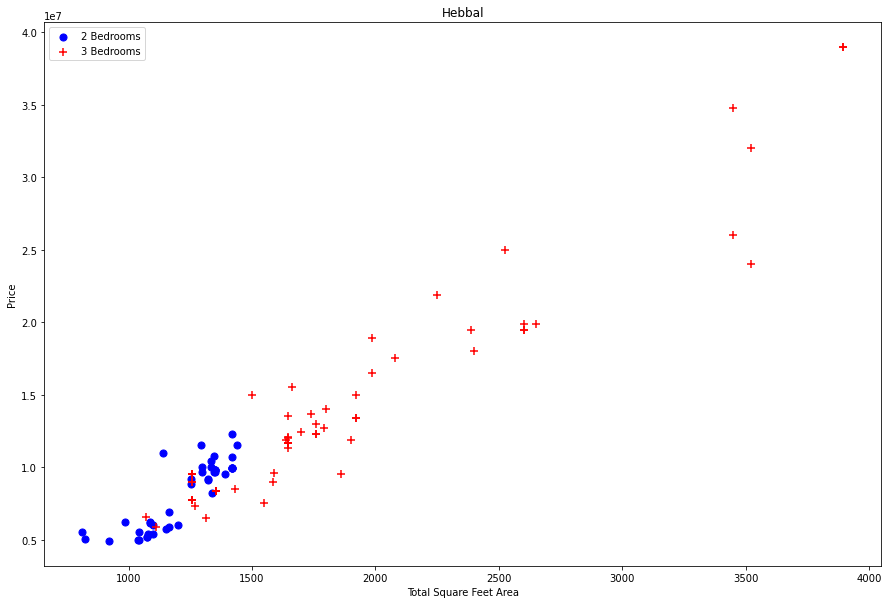

In [77]:
scatter_chart(df7,'Hebbal')

In [78]:
def remove_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bedrooms_stats={}
        for bedrooms,bedrooms_df in location_df.groupby('bedrooms'):
            bedrooms_stats['bedrooms']={
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms,bedrooms_df in location_df.groupby('bedrooms'):
            stats=bedrooms_stats.get(bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices,bedrooms_df[bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

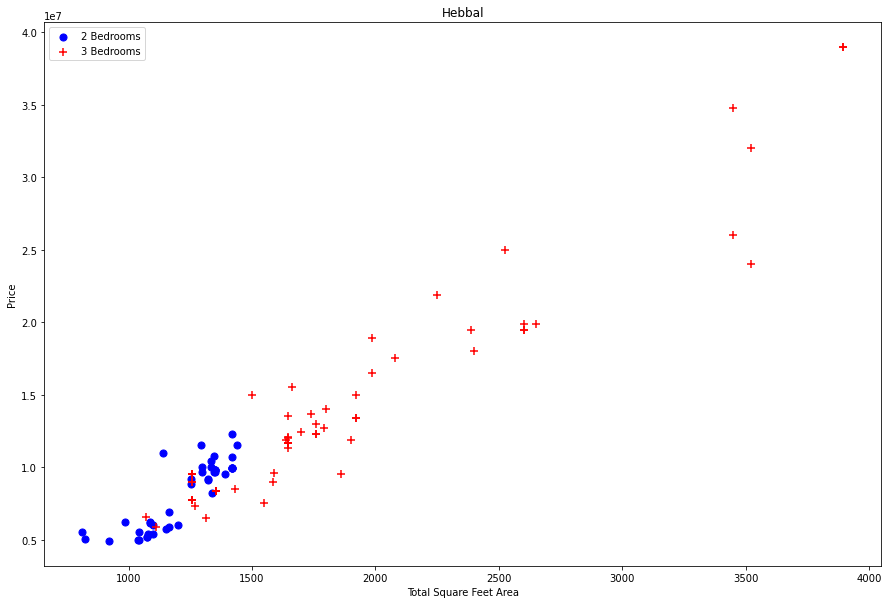

In [79]:
df8=df7.copy()
remove_outliers(df8)
scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

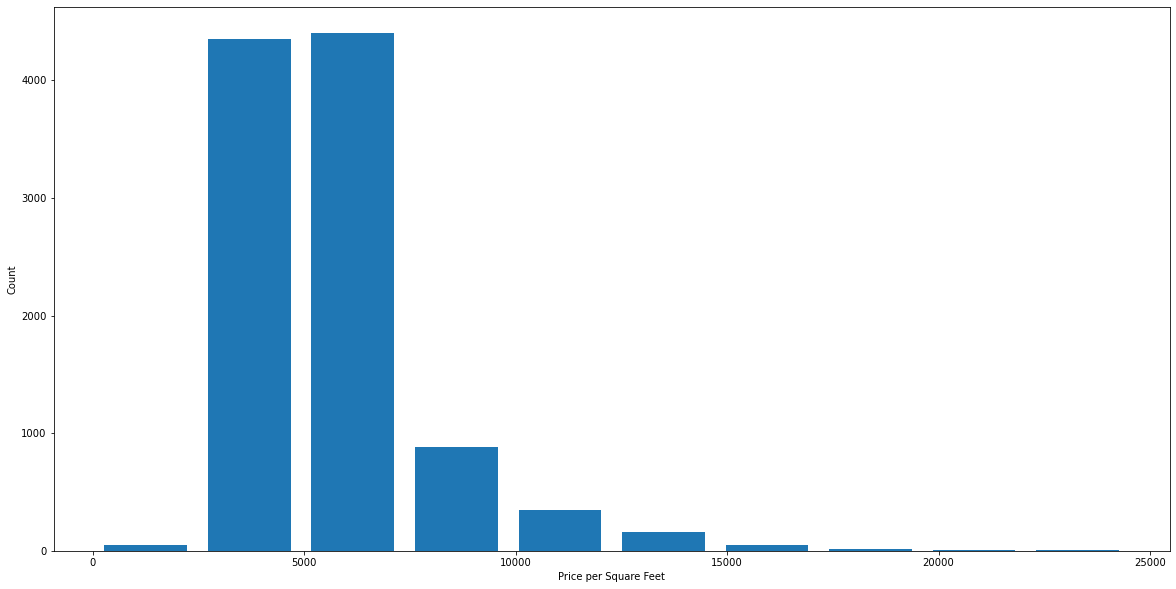

In [80]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

## Analyse the relation between the bedroom number and bathrooms numbers

Remove houses that have bathrooms 2 plus more than no. of bedrooms.

In [81]:
df8[df8.bath>(df8.bedrooms+2)]

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
1632,Built-up Area,Chikkabanavar,4,2460.0,7,2,8000000.0,3252.032520
5255,Built-up Area,Nagasandra,4,7000.0,8,2,45000000.0,6428.571429
5866,Super built-up Area,Other,6,11338.0,9,1,100000000.0,8819.897689
9038,Super built-up Area,Thanisandra,3,1806.0,6,2,11600000.0,6423.034330


In [82]:
df9= df8[df8.bath<(df8.bedrooms+2)]

Drop price_per_sqft

In [83]:
df9=df9.drop('price_per_sqft',axis='columns')

Convert area_type and location to numarical values

In [84]:
df10=df9.copy()
df11=pd.get_dummies(data=df10, columns=['area_type', 'location'])
df11

,bedrooms,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,4,2850.0,4,1,42800000.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3,2,19400000.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2,3,23500000.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2,0,13000000.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2,2,14800000.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,3,1676.0,3,2,9213000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10269,3,2503.0,3,3,13800000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10270,3,1855.0,3,3,13500000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10271,3,1876.0,3,3,16000000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Prepare data for training

In [85]:
X=df11.drop('price',axis='columns')
X

,bedrooms,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,4,2850.0,4,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,3,1676.0,3,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10269,3,2503.0,3,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10270,3,1855.0,3,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10271,3,1876.0,3,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
y=df11.price
y

0        42800000.0
1        19400000.0
2        23500000.0
3        13000000.0
4        14800000.0
            ...    
10268     9213000.0
10269    13800000.0
10270    13500000.0
10271    16000000.0
10272     9213000.0
Name: price, Length: 10177, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [88]:
#from sklearn.linear_model import LinearRegression
#lr_clf=LinearRegression()
#lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)

In [89]:
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import cross_val_score
#cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#cross_val_score(LinearRegression(),X,y,cv=cv)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
def best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cycle']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [95]:
best_model(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.053835137893946e+16, tolerance: 58474801801071.53
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3606456658107597e+17, tolerance: 58018955374100.07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2983979325204379e+17, tolerance: 56586913842516.42
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 825, in fit
    raise ValueError("selection should be either random or cyclic.")
ValueError: selection should be either random or cyclic.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Progr

,model,best_score,best_params
0,linear_regression,-34.869656,{'normalize': True}
1,lasso,-35.064225,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.602803,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [96]:
X.columns

Index(['bedrooms', 'total_sqft', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=250)

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lr_clf=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',random_state=0)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.42340586946080483

In [98]:
def predict_price(area_type,location,bedrooms, total_sqft, bath, balcony):
    area_type_index=np.where(X.columns==area_type)[0][0]
    location_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=bedrooms
    x[1]=total_sqft
    x[2]=bath
    x[3]=balcony
    if area_type_index>=0:
        x[area_type_index]=1
    if location_index>=0:
        x[location_index]=1
    return lr_clf.predict([x])[0]

In [104]:
predict_price('area_type_Plot  Area','location_Vishveshwarya Layout',4, 1200, 2, 2)

14900000.0

In [106]:
predict_price('area_type_Plot  Area','location_Yelahanka',6, 2200, 3, 2)

14700000.0

In [107]:
predict_price('area_type_Super built-up  Area','location_Yelahanka',6, 1200, 4, 3)

6500000.0

## save the model

In [108]:
import pickle
with open('house_price_model.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [109]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))